In [193]:
def comparison(s, word, g, y):
    score = 0
    if word[0] == s[0]:
        score += g
    elif word[0] in s:
        score +=y
    if word[1] == s[1]:
        score += g
    elif word[1] in s:
        score +=y
    if word[2] == s[2]:
        score += g
    elif word[2] in s:
        score +=y
    if word[3] == s[3]:
        score += g
    elif word[3] in s:
        score +=y
    if word[4] == s[4]:
        score += g
    elif word[4] in s:
        score +=y
    return score

In [194]:
def scoring(s, g, y):
    score = 0
    for word in solutions:
        score += comparison(s, word, g, y)
    return score

In [151]:
df = pd.DataFrame(solutions, columns=['words'])
df['scoring'] = df['words'].apply(lambda s: scoring(s))

In [152]:
df.sort_values('scoring', ascending=True)

,words,scoring
253,vivid,1787
1649,fuzzy,1879
2137,mamma,1899
96,civic,1939
392,fluff,1979
...,...,...
560,arise,5720
1668,raise,5721
878,slate,5766
1252,arose,5781


In [244]:
import pickle
import random

import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter

global init

init_flag = False


def init(soln, i):
    global exs, letters, solutions, test, actual_solution, attempts, df
    
    attempts = []
    
    with open('solutions.pkl', 'rb') as f:
        solutions = pickle.load(f)
        
    with open('test_set.pkl', 'rb') as f:
        test = pickle.load(f)
        
#     actual_solution = solutions[i]
#     actual_solution = random.choice(solutions)
#     actual_solution = soln
        
#     df = pd.read_csv('scored_words.csv')
    df = pd.read_csv('scored_solution.csv')
    
    alphabet = [s for s in 'abcdefghijklmnopqrstuvwxyz']
    
    letters = {
        '1': alphabet,
        '2': alphabet,
        '3': alphabet,
        '4': alphabet,
        '5': alphabet
    }
    
    exs = {
        '1': [],
        '2': [],
        '3': [],
        '4': [],
        '5': []
    }

        
def guess(count, verbose, a, b, no_solns):
    global attempts, df
    
    yellows, exemptions = [], []
    greens = [None, None, None, None, None]
    
    if count == 0:
        attempt = a
    
    elif count == 1:
        if len(solution) > no_solns:
            attempt = b
        else:
            attempt = df['words'].iloc[0]
            if attempt in attempts:
                df = df[~df['words'].isin([attempt])]
                attempt = df['words'].iloc[0]
    else:
        attempt = df['words'].iloc[0]
        if attempt in attempts:
            df = df[~df['words'].isin([attempt])]
            attempt = df['words'].iloc[0]
            
    attempts.append(attempt)
    print('attempt')
    
    if verbose:
#         print('Guesses: ' + str(attempts))
#         print('Solution: ' + actual_solution)
        
    for i, character in enumerate(attempt):
        if character == actual_solution[i]:
            greens[i] = character
        elif character in actual_solution:
            yellows.append(character)
            exs[str(i+1)] = character
        else:
            exemptions.append(character)
            
    return greens, yellows, exemptions, attempt


def iteration(a, b, soln, i, no_solns, verbose=False):
    global df, init_flag, attempts, solution
    
    stop = False
    count = 0
    while stop == False:

        if init_flag == False:
            init(soln, i)
            init_flag = True

        greens, yellows, exemptions, attempt = guess(count, verbose, a, b, no_solns)

        for i, green in enumerate(greens):
            if green:
                letters[str(i+1)] = green
        if count == 0:
            solution = [word for word in solutions if all(x in word for x in yellows) 
                         and any(x in word[0] for x in letters['1'])
                         and any(x in word[1] for x in letters['2'])
                         and any(x in word[2] for x in letters['3'])
                         and any(x in word[3] for x in letters['4'])
                         and any(x in word[4] for x in letters['5'])
                         and not any(x in word[0] for x in exs['1'] if exs['1'])
                         and not any(x in word[1] for x in exs['2'] if exs['2'])
                         and not any(x in word[2] for x in exs['3'] if exs['3'])
                         and not any(x in word[3] for x in exs['4'] if exs['4'])
                         and not any(x in word[4] for x in exs['5'] if exs['5'])
                         and not any(x in word for x in exemptions)
                        ]
        else:
            solution = [word for word in solution if all(x in word for x in yellows) 
                         and any(x in word[0] for x in letters['1'])
                         and any(x in word[1] for x in letters['2'])
                         and any(x in word[2] for x in letters['3'])
                         and any(x in word[3] for x in letters['4'])
                         and any(x in word[4] for x in letters['5'])
                         and not any(x in word[0] for x in exs['1'] if exs['1'])
                         and not any(x in word[1] for x in exs['2'] if exs['2'])
                         and not any(x in word[2] for x in exs['3'] if exs['3'])
                         and not any(x in word[3] for x in exs['4'] if exs['4'])
                         and not any(x in word[4] for x in exs['5'] if exs['5'])
                         and not any(x in word for x in exemptions)
                       ]

#         if verbose:
#             print('Solution list: ' + str(solution))
            
        df = pd.DataFrame(solution, columns=['words'])
        df['scoring'] = df['words'].apply(lambda s: scoring(s, 13, 1))
#         if verbose:
#             print(df.sort_values('scoring', ascending=False))
        
        df = df[df['words'].isin(solution)].sort_values('scoring', ascending=False)
#         print(df)
        
        count += 1
        if len(solution) == 1:
            if attempt not in solution:
                count += 1
            stop = True
            init_flag = False
        if count == 6:
#             print('failed')
#             print(actual_solution)
            stop = True
            init_flag = False
    return count

In [243]:
count = 0

samples=1

for i in range(samples):
    count += iteration('stale', 'irony', 'vivid', i, 200, verbose=True)
    
count/samples

Guesses: ['stale']
Solution: cigar
Solution list: ['cigar', 'karma', 'major', 'marry', 'croak', 'maxim', 'parry', 'gamma', 'briar', 'gaudy', 'vodka', 'radio', 'favor', 'panic', 'agora', 'aroma', 'harry', 'comma', 'foray', 'cargo', 'hairy', 'canny', 'bayou', 'manor', 'apron', 'cacao', 'gawky', 'madam', 'augur', 'wacky', 'angry', 'aphid', 'dandy', 'carry', 'fanny', 'rainy', 'daddy', 'aging', 'mocha', 'pagan', 'human', 'manga', 'groan', 'fairy', 'ardor', 'nanny', 'handy', 'ninja', 'vapor', 'acorn', 'aping', 'mania', 'borax', 'china', 'rabid', 'caddy', 'magic', 'macaw', 'candy', 'march', 'arbor', 'hardy', 'razor', 'wagon', 'cabin', 'fancy', 'friar', 'dairy', 'among', 'rabbi', 'agony', 'urban', 'rajah', 'gonad', 'adorn', 'mafia', 'array', 'vapid', 'acrid', 'mayor', 'randy', 'radar', 'canon', 'pizza', 'baggy', 'mammy', 'nadir', 'havoc', 'annoy', 'kappa', 'bawdy', 'radii', 'dogma', 'nomad', 'cocoa', 'mango', 'rumba', 'audio', 'manic', 'admin', 'macho', 'harpy', 'cairn', 'broad', 'axiom', 'arm

3.0

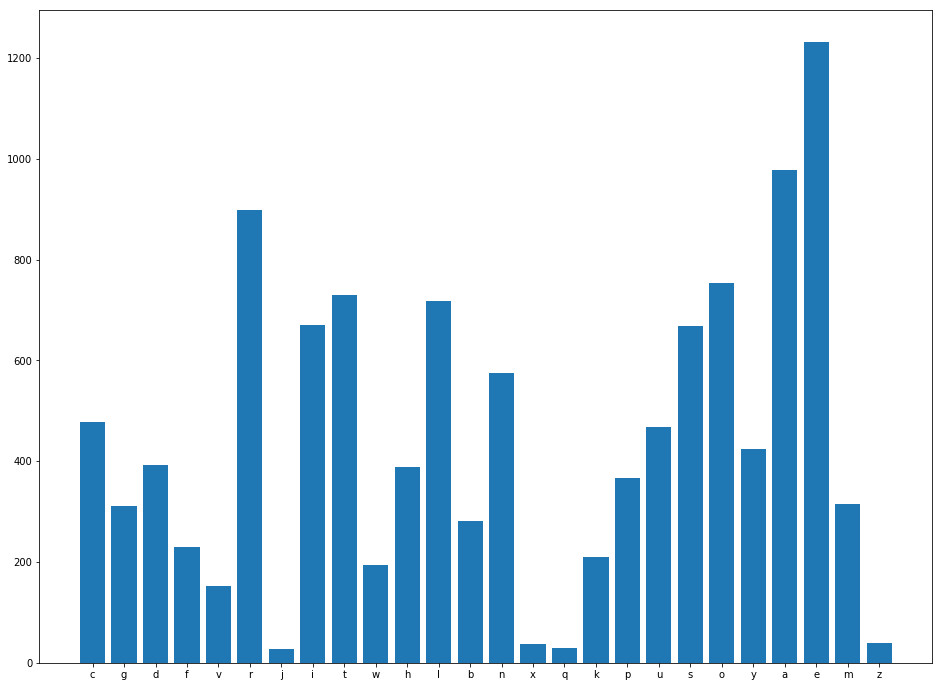

In [61]:
w = Counter([s for s in "".join(solutions)])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

In [62]:
sorted(w.items(), key=lambda item: item[1], reverse=True) # e a r o t l i s n c

[('e', 1233),
 ('a', 979),
 ('r', 899),
 ('o', 754),
 ('t', 729),
 ('l', 719),
 ('i', 671),
 ('s', 669),
 ('n', 575),
 ('c', 477),
 ('u', 467),
 ('y', 425),
 ('d', 393),
 ('h', 389),
 ('p', 367),
 ('m', 316),
 ('g', 311),
 ('b', 281),
 ('f', 230),
 ('k', 210),
 ('w', 195),
 ('v', 153),
 ('z', 40),
 ('x', 37),
 ('q', 29),
 ('j', 27)]

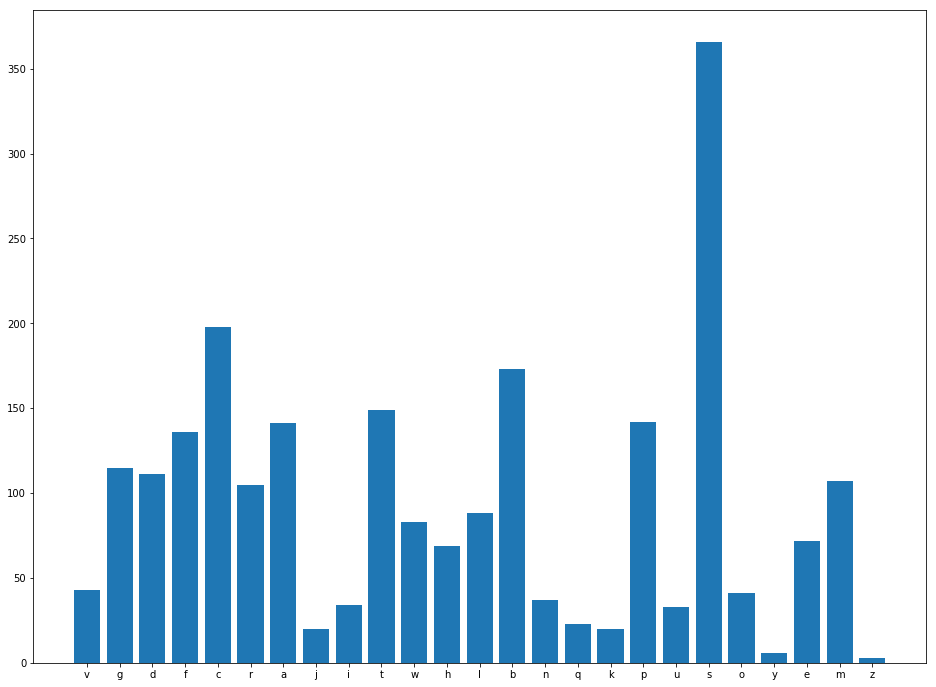

In [48]:
w = Counter([s for s in "".join([t[0] for t in solutions])])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

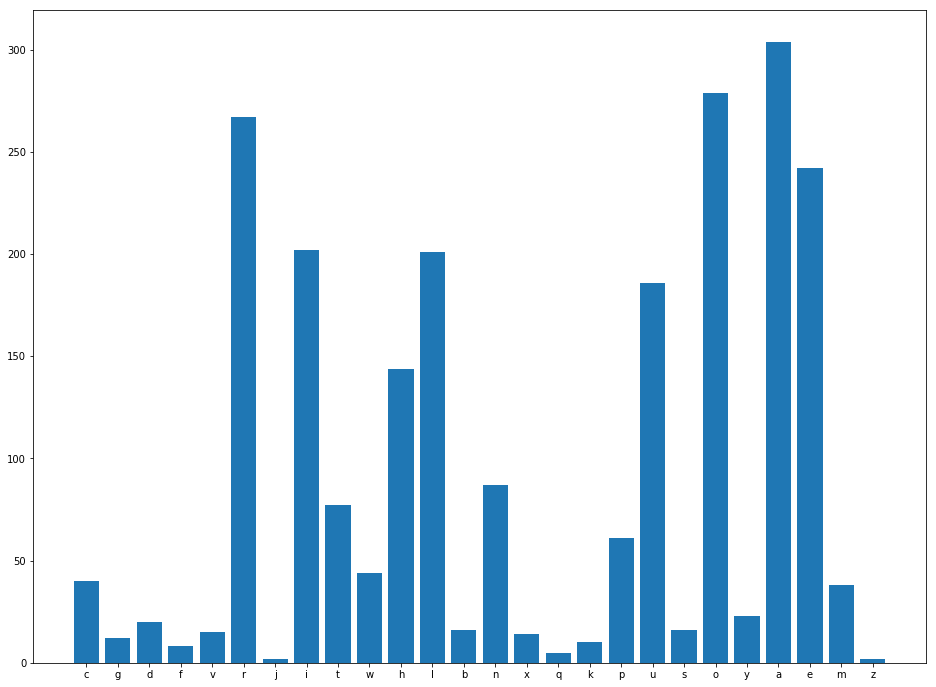

In [49]:
w = Counter([s for s in "".join([t[1] for t in solutions])])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

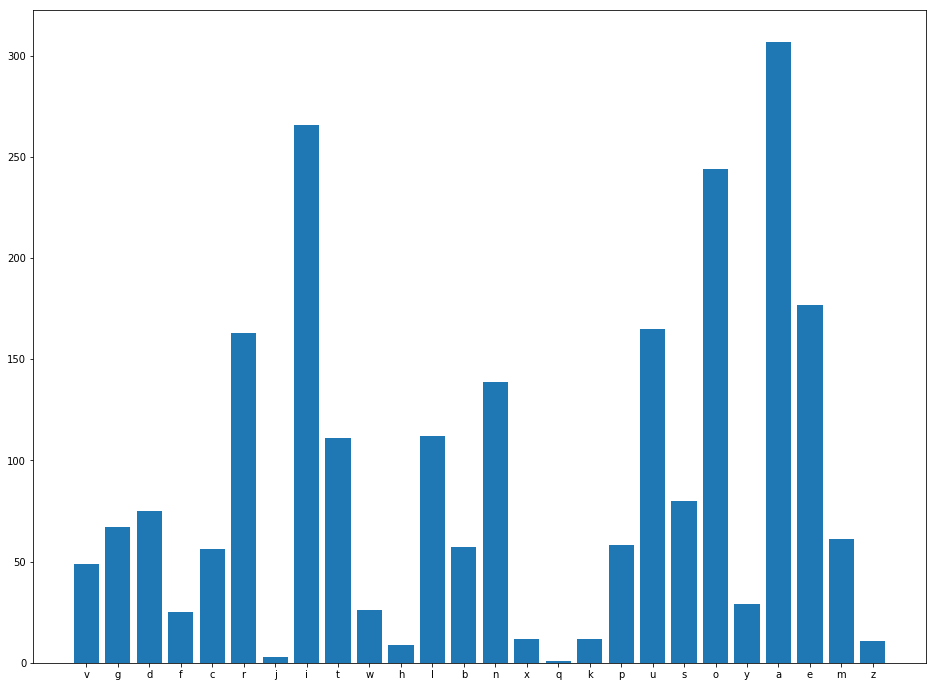

In [50]:
w = Counter([s for s in "".join([t[2] for t in solutions])])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

In [53]:
from collections import OrderedDict, Counter

class OrderedCounter(Counter, OrderedDict):
    pass

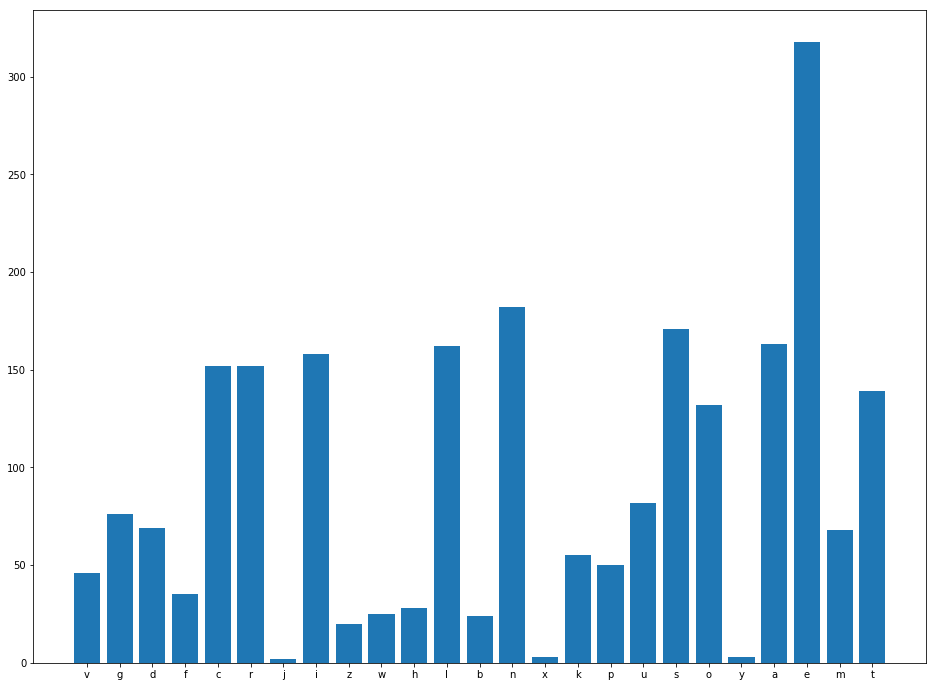

In [51]:
w = Counter([s for s in "".join([t[3] for t in solutions])])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

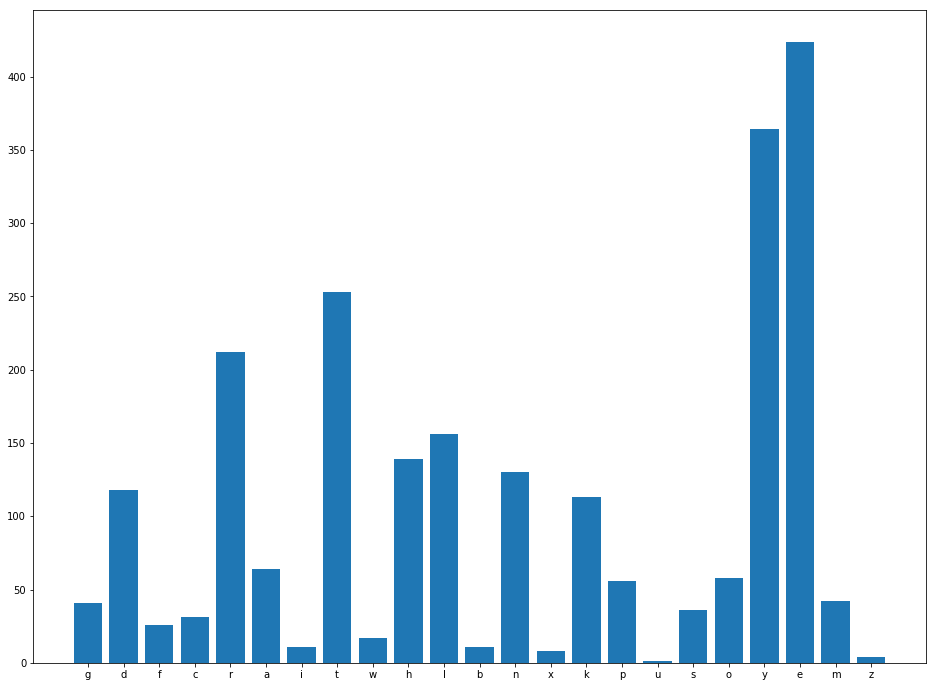

In [52]:
w = Counter([s for s in "".join([t[4] for t in solutions])])

plt.figure(figsize=(16,12))
plt.bar(w.keys(), w.values())
plt.show()

In [60]:
sorted(w.items(), key=lambda item: item[1], reverse=True)

[('e', 424),
 ('y', 364),
 ('t', 253),
 ('r', 212),
 ('l', 156),
 ('h', 139),
 ('n', 130),
 ('d', 118),
 ('k', 113),
 ('a', 64),
 ('o', 58),
 ('p', 56),
 ('m', 42),
 ('g', 41),
 ('s', 36),
 ('c', 31),
 ('f', 26),
 ('w', 17),
 ('i', 11),
 ('b', 11),
 ('x', 8),
 ('z', 4),
 ('u', 1)]

In [ ]:
# e a r o t l i s n c

In [ ]:
stale # # r o i n c

In [64]:
[word for word in solutions if word[0] == 'o']

['outdo',
 'offal',
 'ought',
 'other',
 'oxide',
 'olive',
 'octal',
 'onset',
 'ombre',
 'opium',
 'octet',
 'onion',
 'ozone',
 'ovary',
 'ocean',
 'often',
 'outgo',
 'outer',
 'otter',
 'offer',
 'overt',
 'ovoid',
 'oaken',
 'owner',
 'optic',
 'obese',
 'oddly',
 'orbit',
 'ovate',
 'order',
 'omega',
 'olden',
 'older',
 'opine',
 'owing',
 'odder',
 'ounce',
 'opera',
 'ovine',
 'occur',
 'organ']

In [54]:
counter = OrderedCounter([s for s in "".join([t[4] for t in solutions])])

In [55]:
for key, value in counter.items():
    print(key, value)

r 212
t 253
y 364
h 139
e 424
l 156
f 26
a 64
k 113
n 130
s 36
x 8
d 118
p 56
o 58
c 31
m 42
b 11
g 41
w 17
u 1
i 11
z 4


In [56]:
{k: v for k, v in sorted(counter.items(), key=lambda item: item[1])}

{'a': 64,
 'b': 11,
 'c': 31,
 'd': 118,
 'e': 424,
 'f': 26,
 'g': 41,
 'h': 139,
 'i': 11,
 'k': 113,
 'l': 156,
 'm': 42,
 'n': 130,
 'o': 58,
 'p': 56,
 'r': 212,
 's': 36,
 't': 253,
 'u': 1,
 'w': 17,
 'x': 8,
 'y': 364,
 'z': 4}